# Non-Linear Programming

## Try me
 [![Open In Colab](../../_static/colabs_badge.png)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/NLP/tutorials/NLP%20Intro.ipynb)[![Binder](../../_static/binder_badge.png)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FNLP%2Ftutorials%2FNLP%20Intro.ipynb)

## Introduction
A non-linear programming (NLP) problem is similar to a linear programming problem in the sense that it is also composed of an objective function and constraints, but a NLP includes **at least** a non-linear function. In general, this chapter will deal with continuous decision variables and problems where either the objective function, or any of the constraints are not linear.
NLP problems are in many cases more difficult to solve than linear programming problems. 
The mathematical foundations of NLP optimisation date back to the enlightenment era and the work of Joseph Louis Lagrange, a great mathematician and astronomer. 
He developed a method to take into account non-linear constraints into optimisation problems, which is called Lagrange multipliers, and that will be used in constrained NLP.
In this introduction, we will use some Python code snippets to show why NLP are more difficult to solve. 

### Hard to distinguish local and global optimal values
In linear programming, methods like the simplex need only to know the value of the unknowns and the value of the objective function to determine if the solution is optimal, because the maximum is always at a vertex of the feasibility region. 
Non-linear functions have **critical points** (we will provide a more formal definition of a critical point later on in the book), which can be either local or global maxima or minima:

- **Local maximum**: The value of the function at the critical point is higher than the values of the function around the critical point.
- **Global maximum**: The value of the function at the critical point is the highest value of the function. 
- **Local minimum**: The value of the function at the critical point is lower than the values of the function around the critical point.
- **Global minimum**: The value of the function at the critical point is the lowest value of the function.

Let us look at one example in Python.

Text([-2.21212121], 212.0460765561599, 'Local max')

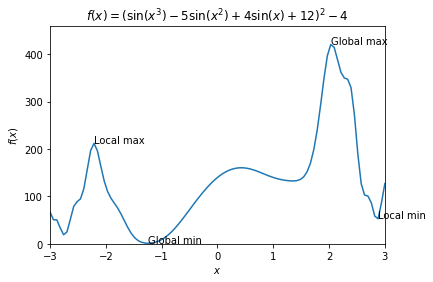

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3, 100)
y = (np.sin(x**3) - 5*np.sin(x**2) + 4*np.sin(x) + 12)**2 - 4
plt.plot(x,y)



plt.title('$f(x)=(\sin(x^3) - 5\sin(x^2) + 4\sin(x) + 12)^2 -4$')

# sets limits
plt.xlim((-3,3))
plt.xlabel(r'$x$')

plt.ylim((0,459))
plt.ylabel(r'$f(x)$')

global_min = np.min(y)
global_min_x = x[np.argmin(y)]

global_max = np.max(y)
global_max_x = x[np.argmax(y)]

plt.annotate('Global min', (global_min_x, global_min))
plt.annotate('Global max', (global_max_x, global_max))

local_min = np.min(y[x > 1])
local_min_x = x[y == local_min]


plt.annotate('Local min', (local_min_x, local_min))
local_max = np.max(y[x < -1])
local_max_x = x[y==local_max]

plt.annotate('Local max', (local_max_x, local_max))

As it can be noted in the graph, the function has many critical points. Any critical point can be a local maximum or a global maximum depending on the range of values that x can take. For instance, if x could only take values in the range $x \in [-3, 0]$, then the local maximum would become a global maximum. This makes it somewhat more difficult to find the optimal solution in an optimisation problem.

### Optima not restricted to vertex
With non-linear functions, the optimal (maximum or minimum) value might no longer be at one of the vertices. For instance, let us take us an example the function in the following Python script:

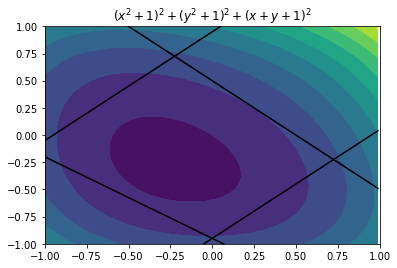

In [44]:
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x, y, sparse=True)
z = (xx**2+ 1)**2+ (yy**2+ 1)**2+ (xx+yy+ 1)**2
h = plt.contourf(x,y,z,levels=10)
plt.plot(x,y+0.95,color='black')
plt.plot(x,-y+0.5, color='black')
plt.plot(x,y-0.95, color='black')
plt.plot(x,-0.75*y-0.95, color='black')
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.title('$(x^2+ 1)^2+ (y^2+ 1)^2+ (x+y+ 1)^2$')
plt.show()

The example shows a non-linear function on two decision variables, x and y. The black lines represent some constraints limiting the feasibility region. The contour graph shows that the maximum value of the objective function is within the interior of the feasibility region and not in one of the vertices. 

The following situations are examples where the optimal value might not be at one vertex of the feasibility region: 

- Multimodal function: As in the example above, the function might be **multimodal** and depend on several decision variables, increasing its complexity.
- Interior optima: As in the example above, the optimal value might be found in an interior point of the feasibility region.
- Discontinuous: The objective function might be discontinuous and again, the optimal value might not be surely located in one vertex.

### Complex mathematical theory
Given that the objective functions and the constraints can be of any family of functions, potentially, there is a huge body of mathematical theory that can be applied to NLP, since non-linear functions have a wide range of characteristics. Definitively, this makes NLP somewhat more difficult. The theoretical framework is more sophisticated, and modeling is also more difficult, since the researcher needs to define the types of function to use in the model.

### Solver selection
Due to the complex mathematical theory behind, selecting the right solver to solve a specific problem can be complex. In fact, different algorithms and solvers can provide different results.
Normally, algorithms deal with local optimisation, rather than global optimisation, and for that reason, the selection of the initial point used to start the algorithm might have an impact in the solution.
Hence, different algorithms might provide different solutions, but when a specific algorithm is selected, its configuration (particularly the initial point) might yield different results. 

## Types of problems
In this chapter, NLP is divided into two different classes of problems with increasing complexity: 

- **Unconstrained NLP Problems** This class of NLP problems have no constraints, we look for a maximum or minimum of the objective function within some bounded decision variables, but not subject to any constraint.

- **Constrained NLP Problems** This class of problems have constraints, i.e. there are restrictions to the objective function solution determined by a set of functions of the decision variables.

Additionally, to better present the mathematical framework behind NLP, we will consider **One-Dimensional** unconstrained problems, where there is only one decision variable, and **Multi-Dimensional** or multi-modal, where there are several decision variables



